Classification with Support Vector Machines
===

A Support vector machine is a binary classifier that determines the hyperplane of maximum separation between any **two** groups.  It works best on linear data, but can be applied to non-linear, multidimensional data.

For multiple groups, SVM determines the sequential hyperplanes between any two groups of the set of groups; it can determine the hyperplane of maximum pairwise seperation between each group and all other groups (one at a time?) and then form the region of maximum seperation from each group to the other groups as a collection of hyperplanes

SVM chooses the seperating hyperplane that is the maximum distance from the collection of all data in each group that is it pairwise seperating.

New (unlabled) test data then becomes easily labeled by comparing it's position in the hyperspace with the set of hyperplanes defined from the training data.

Non-linear data has non-linear hyperplanes -- may or may not be possible

---

How SVM Labels Test Data:
---
Given the known hyperplane location in hyperspace, there exists a vector $\textbf{W}$ that has its origin at the origin **and** is perpendicular to the hyperplane.

For any ("unknown") test data point $\textbf{U}$, the projection (dot product) of $\textbf{U}$ onto $\textbf{W}$ will be either greater or lesser than the "magnitude of $\textbf{W}$", ||$\textbf{W}$||

Specifically, with $b$ as the bias
 * if $\textbf{U}\cdot \textbf{W} + b \geq 0$, then $\textbf{U}$ belongs to group A (right of the hyperplane)
 * if $\textbf{U}\cdot \textbf{W} + b \leq 0$, then $\textbf{U}$ belongs to group B (left of the hyperplane)
 * if $\textbf{U}\cdot \textbf{W} + b = 0$, then $\textbf{U}$ is "on the decision boundary" 

How to Derive $\textbf{W}$ and $b$
---
The equation that we **eventually** need to solve for is $\textbf{U}\cdot\textbf{W} + b$
* How do we find the $\textbf{W}$ and $b$?
* We need both of those to solve this equation for a given vector $\textbf{U}$

To find $\textbf{W}$ and $b$, we need to look at the given information:

We know that, for any $\textbf{x}_{-SV}$ and $\textbf{x}_{+SV}$, 

$$\textbf{x}_{-SV}\cdot\textbf{W} + b = -1$$

and

$$\textbf{x}_{+SV}\cdot\textbf{W} + b = +1$$

To solve this, we also need to introduce $y_i$ (the class info), such that 
* if $y_i \in +Class$, then $y_i = +1$
* if $y_i \in -Class$, then $y_i = -1$

For the $+Class$, we know that $\textbf{x}_i\cdot\textbf{W} + b = +1$ $\rightarrow$ $y_i = +1$

For the $-Class$, we know that $\textbf{x}_i\cdot\textbf{W} + b = -1$ $\rightarrow$ $y_i = -1$

If we multiply each of the above equations by $y_i$, then we can show that 

$$y_i\left(\textbf{x}_i\cdot\textbf{W} + b\right) = 1 \;\;\;\; \forall \textbf{x}_i \in +Class $$
and
$$y_i\left(\textbf{x}_i\cdot\textbf{W} + b\right) = 1 \;\;\;\; \forall \textbf{x}_i \in -Class $$
because $y_i \cdot y_i = (\pm 1)^2 \equiv 1$

Therefore we have $$ y_i\left(\textbf{x}_i\cdot\textbf{W} + b\right) - 1 = 0 $$

---
This equation is a constraint that we as the scientist are imposing onto a "Support Vector". 
But what **is** a Support Vector?

We call each vector to each labeled training data set a "Support Vector" because if we moved them, then it will effect the location of the best dividing hyperplane.  Therefore, in SVM, "Support" mean that the training data support the location of the best separating hyperplane between each group in the data.  In SVM, "Vector" means the vector between the origin and the training data point.

To start estimating the best dividing hyperplane, we could start by fitting a parallel line that goes through the center of each group of data, then finding the width between these parallel lines between group A and group B.  Call that WIDTH

The first "best dividing" hyperplane (BDH) could be set up as the line parallel to BOTH parallel lines through the midpoints, but the BDH is at width WIDTH / 2.

Therefore, there are now 3 parallel lines:
* One that goes through the midpoint of group A
* One that goes through the midpoint of group B
* One (the BDH) that goes through the midpoint of those midpoints

This last one is exactly WIDTH/2 from each of the other parallel lines

---
$\textbf{w} = \max \left\{WIDTH = (\textbf{x}_+ - \textbf{x}_-) \cdot \frac{\textbf{w}}{||\textbf{w}||}\right\} \forall \{\textbf{x}_+ , \textbf{x}_-\}$

Where $\{\textbf{x}_+ , \textbf{x}_-\}$ come from solving $y_i\left(\textbf{x}_i\cdot\textbf{w} + b\right) - 1 = 0$

Therefore: $WIDTH = \frac{2}{||\textbf{w}||}$

As such, $\textbf{w} = \max \left\{WIDTH = \frac{2}{||\textbf{w}||}\right\}$

or for analytical purposes, $\textbf{w} = \min \left\{\frac{||\textbf{w}||}{2}\right\}^2$

with constraint from the support vectors: $y_i\left(\textbf{x}_i\cdot\textbf{w} + b\right) - 1 = 0$

---
Lagrange Multipliers
---

Using Lagrange Multipliers, we can optimize a function with respect to a set of constraints:

maximize $f(x, y)$, subject to $g(x, y) = 0$ (constraint)

We need both $f$ and $g$ to have continuous first partial derivatives.  We introduce a new variable ($λ$), called a Lagrange multiplier, and study the Lagrange function (or Lagrangian) defined by

$$ \mathcal{L}(x,y,\lambda) = f(x,y) - \lambda \cdot g(x,y)$$

<!-- Given $\mathcal{L}(x,y,\lambda)$ defined above, -->

If the solution $(x_o, y_o)$ is the maximum of $f(x,y)$, then $\exists \lambda_o$, such that $(x_o, y_o, \lambda_o)$ is a *stationationary point* of the Lagrangian  $\mathcal{L}(x,y,\lambda)$, such that,

$$\left.\nabla_{x,y,\lambda} \mathcal{L}(x , y, \lambda)\right|_{(x_o, y_o, \lambda_o)} = \left.\left ( \frac{\partial \mathcal{L}}{\partial x}, \frac{\partial \mathcal{L}}{\partial y}, \frac{\partial \mathcal{L}}{\partial \lambda} \right )\right|_{(x_o, y_o, \lambda_o)} \equiv \textbf{0}$$

*This is a necessary, but not sufficient condition*

---
For SVM, we can show that 

$$\mathcal{L}(\textbf{w}, b, \bf{\alpha}) = \frac12||\textbf{w}||^2 - \sum \alpha_i \left[y_i(\textbf{x}_i\cdot\textbf{w} + b - 1)\right] \;\;\;\;\; \text{where}\;\bf{\alpha}\;\text{are the Lagrange multipliers}$$

To solve this equation, we want to **minimum** $\textbf{w}$ AND **maximize** $b$.

---
Why do we want to maximize $b$?

Look at the equation of the hyperplane: $\textbf{w}\cdot\textbf{x} + b$ 
- which looks a lot like $m x + b$, or the equation for a line

So modifying $b$ moves the hyperplane up and down; the same is basically true for hyperplanes
<!--while modifying $\textbf{w}$ changes the angle or slope of the line-->

This makes $b$ your "bias", or global offset -- same as astronomical detectors

---
Back to Lagrange multipliers: 

$$\mathcal{L}(\textbf{w}, b, \bf{\alpha}) = \frac12||\textbf{w}||^2 - \sum \alpha_i \left[y_i(\textbf{x}_i\cdot\textbf{w} + b - 1)\right]$$

We need to solve the linear set of equations for 
$$\left.\nabla_{x,y,\lambda} \mathcal{L}(x , y, \lambda)\right|_{(x_o, y_o, \lambda_o)} = \left.\left ( \frac{\partial \mathcal{L}}{\partial x}, \frac{\partial \mathcal{L}}{\partial y}, \frac{\partial \mathcal{L}}{\partial \lambda} \right )\right|_{(x_o, y_o, \lambda_o)} \equiv \textbf{0}$$

In this case, that is

$$\left.\nabla_{\textbf{w},b,\lambda} \mathcal{L}(x , y, \lambda)\right|_{(x_o, y_o, \lambda_o)} = \left.\left ( \frac{\partial \mathcal{L}}{\partial \textbf{w}}, \frac{\partial \mathcal{L}}{\partial b}, \frac{\partial \mathcal{L}}{\partial \lambda} \right )\right|_{(x_o, y_o, \lambda_o)} \equiv \textbf{0}$$

or 

$$\left( \begin{array}{c} 
    \frac{\partial \mathcal{L}}{\partial \textbf{w}} \\ 
    \frac{\partial \mathcal{L}}{\partial b}          \\
    \frac{\partial \mathcal{L}}{\partial \lambda}    
    \end{array} \right) 
    = \left(\begin{array}{c} 0 \\ 0 \\ 0 \end{array} \right)
$$

Separating this into three equations:

$$ \frac{\partial \mathcal{L}}{\partial \textbf{w}} = \textbf{w} - \sum_i \alpha_i y_i \textbf{x}_i = 0$$
$$\text{or}$$
$$\textbf{w} = \sum \alpha_i y_i \textbf{x}_i$$

Finally, 
$$ \frac{\partial \mathcal{L}}{\partial b} = -\sum_i \alpha_i y_i = 0 
\;\;\;\;\;\text{which becomes}\;\;\;\;\;
 \frac{\partial \mathcal{L}}{\partial b} = \sum_i \alpha_i y_i = 0$$

---
Putting these together and maximizing with respect to $(\textbf{w}, b, \lambda)$, we can show that 
$$ L = \sum \alpha_i - \frac12 \sum_{ij} \alpha_i\alpha_j y_i y_j (x_i \cdot x_j)$$

**Proof:**
Because 
$$\textbf{w} = \sum \alpha_i y_i \textbf{x}_i$$ 
**and** 
$$\mathcal{L}(\textbf{w}, b, \bf{\alpha}) = \frac12||\textbf{w}||^2 - \sum \alpha_i \left[y_i(\textbf{x}_i\cdot\textbf{w} + b - 1)\right]$$

Substituting $\textbf{w}$ in $\mathcal{L}$,but replacing $i \rightarrow j$ in the second summation, gives

$$\mathcal{L}\left(\left(\sum_j \alpha_j y_j \textbf{x}_j \right), b, \bf{\alpha}\right) = \frac12\left|\left|\sum_j \alpha_j y_j \textbf{x}_j\right|\right|^2 - \sum_i \alpha_i \left[y_i(\textbf{x}_i\cdot\left(\sum_j \alpha_j y_j \textbf{x}_j\right) + b - 1)\right] = \frac12\left|\left|\sum_j \alpha_j y_j \textbf{x}_j\right|\right|^2 - \sum_i\sum_j \alpha_i \alpha_j \left[y_i y_j(\textbf{x}_i\cdot\textbf{x}_j) + b - 1)\right]
$$

-- WORK ON THIS PROOF --

---
It is important to cover the formal derivation of the SVM to understand the ups and downs to using it.

    1) Downside: Significant depth of linear algebra (relative difficulty)
    2) Downside: Need to keep all of your feature vectors in memory at the same time to process 
        -- does not scale very well (computational difficulty)
        -- can batch subsets of data into scales of SVM to work with large data sets
        -- one of the more popular choice these days is "Sequential Miminal Optimization" or "SMO"
            created by John Platt at Microsoft
    3) Upside: Once you have trained the SVM, you do not need the feature vectors ever again.
        -- Making predictions from a trained SVM is as simple as 
        
$$predict(x_{new}) = sign[\textbf{w}\cdot x_{new} + b]$$

---
A more simple explanation of SVM
---

Back to the basics: What is the equation for a hyperplane?
$$ \textbf{x}\cdot\textbf{w} + b $$

What is the hyperplane for a + class support vector?

$$ \textbf{x_+}\cdot\textbf{w} + b = +1 $$

What about the hyperplane for a - class support vector?

$$ \textbf{x_-}\cdot\textbf{w} + b = -1 $$

The $x_i$ that satisfy this constraint are called the "Support Vectors"

For Example, what if you had $\textbf{u}\cdot \textbf{w} + b = 0.98$?  It's not +1 or -1, so how do we interpret this result?

If we plot all $\textbf{u}$ onto a graph along with the support vector hyperplanes (parallel planes through the midpoint of each class) -- as well as the best separating hyperplane (at the midpoint of those midpoints and parallel to the support vector hyperplanes) -- then where does 0.98 fall on this figure?

The point, $\textbf{u}$, will lie very very close to the + class support vecotr hyperplane.  It's not quite "all the way" to the support vector hyperplane, but it is much much farther into the + class regime, than the - class regime; and not even close to the decision boundary

---
**Decision Boundary**

If, for a given vector $\textbf{u}$, we have that $\textbf{u}\cdot\textbf{w}+b \equiv 0$, then $\textbf{u}$ is part of the (or on the) "decision boundary"

---
**Classification of a feature set:** What is the equation that will determine the classes of every element in a feature set, $\{\textbf{x}_i\}$? 

$$\text{Class} \equiv Sign\{\textbf{x}_i\cdot\textbf{w} + b\}$$

That is simply asking "is this point in the feature set LEFT or RIGHT of the best dividing hyperplane?

---
**Determine the hyperplane:** How to determine $\textbf{w}$ \& $b$?

- Want maximize $||\textbf{w}||$ and minimize $b$

There are an infinite "number" of $\textbf{w}$'s and an infinite number of $b$'s. Remember, that we want to maximize the MAGNITUDE (||w|||) of $\textbf{w}$, which is the euclidean norm between the components.

Therefore, what is the constraint of $||\textbf{w}||$ and $b$?

From the more rigorous tutorial above, the constraint is $$y_i\left(\textbf{x}_i\cdot\textbf{w}+b\right) \geq 1$$

Because our classes ($y_i$) will be either a +1 or a -1, with the knowledge of the hyperplane $\textbf{x}_i\cdot\textbf{w}+b$, our constraint becomes:

$$y_i\left(\textbf{x}_i\cdot\textbf{w}+b\right) \geq 1 \;\;\;\; \text{as specified above}$$

This is because for -1 class, $\textbf{x}_i\cdot\textbf{w}+b = -1$ and for +1 class $\textbf{x}_i\cdot\textbf{w}+b = +1$, so multiplying both sides by $y_i$ -- which is also -1 or +1, respecitively -- makes the right hand side (RHS) == 1 for all feature values.

**Note** that there are an infinite number of $\textbf{w}$ and $b$ such that the constraint $y_i\left(\textbf{x}_i\cdot\textbf{w}+b\right) \geq 1$ is satisfied.  
- Therefore, we must find the mimium $\textbf{w}$ and maximum $b$ (simultaneously?) that satisfy this constraint.
- This generates a quadratic computational problem
- The good news is the SVM has been shown to be convex (the shape of the paramater space is convex)
    - convex: Any line between any two points on the boundaries does not cross any other boundary
        - this implies that there are no local minima, which is too good to be true

We want to use this to minimize $||\textbf{w}||$ while we maximize $b$, such that $y_i(\textbf{x}_i\cdot\textbf{w} +b) \geq 1$.  Where **(he finally declared)** that $\textbf{x}_i$ and $y_i$ are your training data set features and labels! **But**, the "support vectors" are *ONLY* the feature-label pairs that match "pefectly" (close enough) to the constraint equation.  Such that, $x_i$ and $y_i$ are the entire feature-label pairs, but a specific subset of these that "[close enough to] perfectly" satisfy the constraint equation -- $y_i(\textbf{x}_i\cdot\textbf{w} +b) - 1 = 0$ -- are called the "support vectors".

---
What is an example of a vector $\textbf{w}$?
- In 2D feature space (because SVM is a binary classifier), $\textbf{w}$ could be $[5,3]$
- It could also be $[-5,3]$, which has the same magnitue:  or $||[-5,3]|| = ||[5,3]|| = \sqrt{34}$

If we are minimizing the magnitude of $||\textbf{w}||$ and maximizing $b$, how can we discern between $[5,3]$ and $[-5,3]$?

<p>
# \*\*\*\*\*\*\*\*\*\*\*\*
<center> **Because** we are **ONLY** maximizing and minimizing **WITH RESPECT TO** the constraint $y_i(\textbf{x}_i\cdot\textbf{w} + b) - 1$ </center>
<center> **AND**  $[5,3]$ is **VERY** different from $[-5,3]$ in the dot product with the training data </center>
# \*\*\*\*\*\*\*\*\*\*\*\*

---
How to derive $\textbf{w}$
---

- Start with an initial guess: $\textbf{w}  = [5,5]$ and look for the maximum value for $b$ that satisfies the constraint $y_i(\textbf{x}_i\cdot\textbf{w} + b) - 1$ and this is your candidate, initial hyperplane

- Take initial guesses, calculate the magnitute and use the constraint equation to derive the maximum value of $b$
- Step down in magnitude space by moving to a small vector in feature space and re-asses the magnitude as well as $b$

**Because this problem has been shown to be convex:**
- If you take baby steps, then you can determine the local slope. 
- Then take larger steps in that direction until you pass the global minimum: chisq_new > chisq_old
- Reduce your step size and go back until chisq_new > chisq_old and bounce like this until "convergence"

**Because Convex: All Local Minima == Global Minimum**

Without the knowledge of convex mapping, SVM minimization can avoid being trapped in a local minimum

- For a given guess of the $\textbf{w}$, we will increase $b$ until the constraint equation $y_i(\textbf{x}_i \cdot \textbf{w} + b) \geq 1$
- Save this combination in a dictionary \{||$\textbf{w}||$:$\textbf{w}$, $b$\}

Scikit-Learn Implementation
---

Copy the KNN-C code and substitute "SVM" in for the previously implemented KNN

In [117]:
import numpy as np
from sklearn import preprocessing, cross_validation, svm#, neighbors
import pandas as pd

df  = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?', -99999, inplace=True)

useless = ['ID']
df.drop(useless, 1, inplace=True)

X   = np.array(df.drop(['class'], 1))
y   = np.array(df['class'])

test_size   = 0.2
accuracies  = []
nIters      = 100
for k in range(nIters):
    X_train, X_test, y_train, y_test    = cross_validation.train_test_split(X,y, test_size=test_size)

    # clf = neighbors.KNeighborsClassifier()
    clf = svm.SVC()
    clf.fit(X_train, y_train)

    accuracy    = clf.score(X_test, y_test)
    accuracies.append(accuracy)
#     print "{0:d} Accuracy = {1:.2f}%".format(k, accuracy*100)

print "Mean Accuracy = {0:.2f}%".format(np.mean(accuracies)*100)

example_measures    = np.array([[4,2,1,1,1,2,3,2,1], [4,2,1,2,2,2,3,2,1]])
example_measures    = example_measures.reshape(len(example_measures), -1)

prediction  = clf.predict(example_measures)
print prediction

Mean Accuracy = 96.02%
[2 2]


**Sentdex Reference Material:**
https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf
http://research.microsoft.com/pubs/68391/smo-book.pdf
http://cvxopt.org/

**Optimization algorithm idea: (j.fraine 6-7-16)**
- involving friction: if f(x_new) > f(x_old), "accelerate" walker in the opposition direction and add "friction" (shorten length scale of steps)

**Bayesian Analysis Constraint Method**:
- use "prior" on the posterior to be the constraint in question
- for SVM, set log(prior) = 0 if $y_i\left(\textbf{x}_i\cdot\textbf{w}+b\right) < 1$ and log(prior) = 1 if $y_i\left(\textbf{x}_i\cdot\textbf{w}+b\right) \geq 1$

**Cool Clock Idea:**
- Start with http://demo.bokehplots.com/apps/timeout
- Make the numbers appear every second with the current second for this minute
- Make all the numbers from seconds that have past fade away over time (maybe 10 - 20s each)
- Have the minute number update *in the same place* over and over again -- still fading away, but every 5 - 10s pulse
- The location of the minute is static for 1 minute, then randomly chosen somewhere else for the next minute
- Same thing for the hour, but make it pulse slower (maybe once per minute)
- Have specific colors and sizes for the hour, minute, seconds in order to easily differentiate between them
- Possible do the same for the date

**My thoughts on deriving the best separating hyperplane for an SVM (at least an initial guess):** 
- Start with the median over feature space of all points in the +Class and all of the points in the -Class.
- Then determine the slope for a line through the median of the -Class and the median of the +Class that is parallel to each other
    - (i.e. has the **same** slope)
- Next, rotate the line around the median of +Class and the median of -Class, keeping them parallel, until they are maximally separated.
- Then, the initial guess hyperplane in the midploint between the two medians from each class with a slope that is parallel (a.k.a. equal) to the maximizing parallel slope of the two classes themselves


**Option 2:**
- Start with any random guess for the slope
- Assess the medians of each class, call them +med and -med
- use a minimizer on the Lagrange multiplier equation that minimizes the magnitude of $\textbf{w}$ and maximizes $b$.
- The minizer criterion could be "maximum difference between all members of each class
    - Do this simultaneously, not in a stepping pattern like Sentdex is proposing
    - Maybe estimate with MCMC

My Personal Example of SVM Classication with SKLearn
---

**Load all necessary libraries and set matplotlib to inline with figsize = 12,12**

In [47]:
%matplotlib inline
import numpy as np
from matplotlib.pyplot import plot, scatter, xlim, ylim, cm, rcParams
from sklearn.svm import SVC
from sklearn.cross_validation import train_test_split

rcParams['figure.figsize'] = 12,12

**Generate input data for positions in 2D space**

In [15]:
nPts            = 1e4
xdata           = np.random.normal(0,1, nPts)
ydata           = np.random.normal(0,1, nPts)
iMovers         = np.random.randint(0,xdata.size,xdata.size/2)
movers          = np.ones(xdata.size)
movers[iMovers]-= 2.0

xmax            = 4.0
xdata          += movers*xmax
ydata          += movers*xmax

/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  from ipykernel import kernelapp as app
/Users/jonathanfraine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


**Convert given 2D data to feature space and define labels at 1,-1**

In [16]:
X       = np.transpose([xdata,ydata])
labels  = np.empty(xdata.size)

labels[xdata < 0.0] = -1
labels[xdata > 0.0] =  1 # might be redundant if we start with labels = np.ones

**Split the data in the training and testing subsets for cross-validation**

In [17]:
random_state    = 42
test_size       = 0.8
X_train, X_test, Y_train, Y_test = train_test_split(X, labels, test_size=test_size, random_state=random_state)

**Define and fit the SVC model**

In [18]:
clfr = SVC(kernel='linear', C = 1.0)
clfr.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

**Define the separating hyperplane and hyperplanes for 'closest' Support vectors to hyperplane**

In [19]:
#define the seperating hyperplane
w = clfr.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5*xmax, 2.5*xmax)
yy = a * xx - (clfr.intercept_[0]) / w[1]

# define the parallels to the separating hyperplane that pass through the closest support vectors
b = clfr.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = clfr.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

**Plot the training data, testing data, seperating hyperplane, and closest parallel hyperplanes**

(-10.0, 10.0)

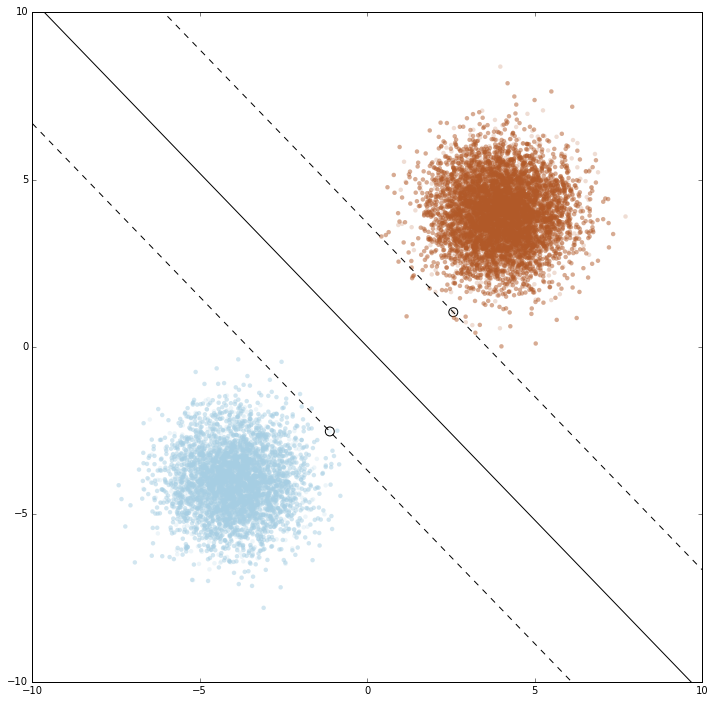

In [26]:
plot(xx, yy, 'k-')
plot(xx, yy_down, 'k--')
plot(xx, yy_up, 'k--')

scatter(clfr.support_vectors_[:, 0], clfr.support_vectors_[:, 1], s=80, facecolors='none')
scatter(X_train[:, 0], X_train[:, 1], c=clfr.predict(X_train), cmap=cm.Paired, alpha=0.2, edgecolor='None')
scatter(X_test[:, 0], X_test[:, 1], c=clfr.predict(X_test), cmap=cm.Paired, alpha=0.5, edgecolor='None')

xlim(-2.5*xmax,2.5*xmax)
ylim(-2.5*xmax,2.5*xmax)

# SentDex Hand-Written SVM Classifier

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

class Support_Vector_Machine(object):
    def __init__(self, visualization=True):
        self.visualization  = visualization
        self.colors         = {1:'orange', -1:'lightblue'}
        if self.visualization:
            self.fig    = plt.figure()
            self.ax     = self.fig.add_subplot(111)
        
        return
    
    def fit(self, data):
        # fit == train
        self.data   = data
        
        # opt_dict = {||w||:[w,b]}
        opt_dict    = {}
        
        # ?? transforms converts w to positive definite ??
        transforms  = [[1 , 1],
                       [-1, 1],
                       [-1,-1],
                       [1 ,-1]]
        
        # This is dirty; fix it; maybe use dictionary of arrays
        all_data    = []
        for yi in self.data:
            for featureset in self.data[yi]:
                for feature in featureset:
                    all_data.append(feature)
        
        self.max_feature_value  = max(all_data)
        self.min_feature_value  = min(all_data)
        
        all_data   = None # Great idea for clearing out memory!
        
        
        # Because support vectors with satisfy: yi*(dot(xi,w) + b) = 1,
        #   we can iterate until abs(yi*(dot(xi,w) + b) - 1) < epsilon ~ 0.01 = 1 / stepstepsize**2
        maxstepsize = 0.1
        stepstepsize= 10.0
        step_sizes = [self.max_feature_value*maxstepsize, 
                      self.max_feature_value*maxstepsize / stepstepsize, 
                      # point of expense:
                      self.max_feature_value*maxstepsize / stepstepsize**2]
        
        # extremely expensive!
        # `b` does not need to take as small of steps as `w` because `b` does not need to be as precise
        #   -- to be explained in application stage
        b_range_multiple    = 5
        
        # we don't need to take as small of steps with `b` as we do with `w`
        b_multiple          = 5
        
        # Start big!
        latest_optimum      = self.max_feature_value*stepstepsize # might be a different x10 here than `stepstepsize`
        
        for step in step_sizes:
            # major corners being cut here!
            
            w = np.array([latest_optimum, latest_optimum])
            
            # Controls for "have you found the minimum"
            # We can do this because the SVM problem is convex
            optimized = False
            
            while not optimized:
                for b in np.arange(-(self.max_feature_value*b_range_multiple), 
                                     self.max_feature_value*b_range_multiple ,
                                     step*b_multiple):
                    for transformation in transforms:
                        w_t         = w*transformation
                        found_option= True
                        
                        # weakest link in the SVM fundamentally
                        # SMO attempts to fix this a bit; but it can only do "enough"
                        # check constraint on all data: yi*(dot(xi, w)+ b)
                        for i in self.data:
                            for xi in self.data[i]:
                                yi = i
                                if not yi*(np.dot(w_t,xi)+b) >= 1:
                                    found_option = False
                                    # should just break once a single feature is out of the range for the hyperplane
                                    break
                        
                        if found_option:
                            opt_dict[np.linalg.norm(w_t)]   = [w_t, b]
                
                if w[0] < 0:
                    optimized  = True
                    print 'Optimized a step.'
                else:
                    # Sentdex wants to know if python broadcasts scalars to lists
                    # w    = [N,N]
                    # step = S
                    #  w - step = [N-S, N-S]
                    w   = w - step
            
            # if we optimized the `w`, then we can trigger the while loop
            # Here we sort the resulting list of norms (magnitudes)
            norms = sorted([n for n in opt_dict])
            
            # assign the best result to our hyperplane slope & intercept
            # note that opt_choice is dictionary organized by the magnitude
            #   and the "minimum" magnitude is the first element in the sorted `norms` array
            # ||w|| : [w,b]
            opt_choice      = opt_dict[norms[0]]
            if np.rank(opt_choice[0]) > 1:
                print opt_choice[0], opt_choice[1]
            self.w          = opt_choice[0]
            self.b          = opt_choice[1]
            
            # Sentdex used `2`, but said we should use `stepstepsize`
            latest_optimum  = opt_choice[0][0] + step*stepstepsize
            
    def predict(self, features):
        # class = sign{dot(x,w) + b}
#         nObs, nFeatures= features.shape
#         classification = np.zeros(nObs)
#         for k in nObs:
#             classification[k] = np.sign(np.dot(np.array(features[k], self.w)) + self.b)
        classification = np.sign(np.dot(np.array(features), self.w) + self.b)
        
        if classification and self.visualization:
            self.ax.scatter(features[0], features[1], s=200, marker='*', c=self.colors[classification])
        
        return classification
    
    def visualize(self):
        [[self.ax.scatter(x[0], x[1], s=200, c=self.colors[i]) for x in data_dict[i]] for i in data_dict]
        
        # hyperplane = dot(x,w) + b
        # v = x.w+b
        def hyperplane(x,w,b,v):
            '''
                x = feature space (theory curve)
                w = best fitted hyperplane slope
                b = best fitted hyperplane intercept
                v = values on the decision plane
            '''
            
            return (-w[0]*x-b+v) / w[1]
        #
        datarange   = self.min_feature_value*0.9, self.max_feature_value*1.1
        hyp_x_min   = datarange[0]
        hyp_x_max   = datarange[1]
        
        psv         = 1  # positive support vector boundary hyperplane
        nsv         = -1 # negative support vector boundary hyperplane
        dec         = 0  # separating hyperplane value
        
        # decision boundary points
        dec1        = hyperplane(hyp_x_min, self.w, self.b, dec)
        dec2        = hyperplane(hyp_x_max, self.w, self.b, dec)
        
        # positive support vector points
        psv1        = hyperplane(hyp_x_min, self.w, self.b, psv)
        psv2        = hyperplane(hyp_x_max, self.w, self.b, psv)
        
        # negative support vector points
        nsv1        = hyperplane(hyp_x_min, self.w, self.b, nsv)
        nsv2        = hyperplane(hyp_x_max, self.w, self.b, nsv)
        
        # plot data points as a straight line
        self.ax.plot([hyp_x_min, hyp_x_max], [dec1, dec2], '-' , c='yellow')
        self.ax.plot([hyp_x_min, hyp_x_max], [psv1, psv2], '--', c='black')
        self.ax.plot([hyp_x_min, hyp_x_max], [nsv1, nsv2], '--', c='black')
        

Optimized a step.
Optimized a step.
Optimized a step.


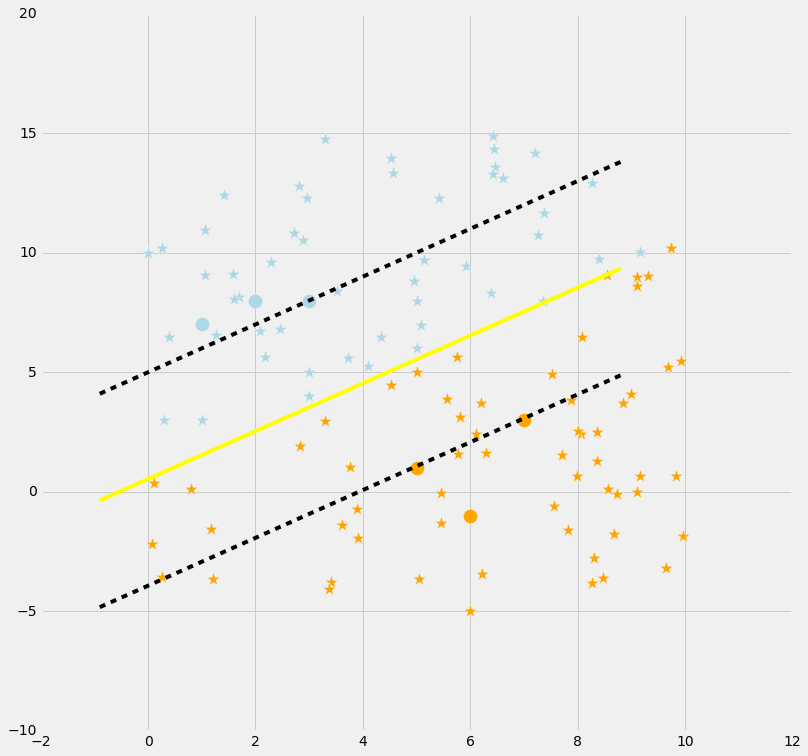

In [100]:
minusClassData  = np.array([[1,7],
                            [2,8],
                            [3,8]])

plusClassData   = np.array([[5,1],
                            [6,-1],
                            [7,3]])

data_dict   = {-1:minusClassData,
                1:plusClassData}

svm = Support_Vector_Machine()
svm.fit(data=data_dict)
predict_us  = [[0,10],
               [1,3 ],
               [3,4 ],
               [3,5 ],
               [5,5 ],
               [5,6 ],
               [6,-5],
               [5,8 ]]


svm.visualize()

for p in predict_us:
    svm.predict(p)

for p in np.random.uniform((0,-5),(10,15),(100,2)):
    svm.predict(p)



# Non-linear Classification with SVM

If data is non-linear distribution, such that there is strong overlap between the data in 2D space,
then it is always possible to add N non-linear dimensions (i.e.: [x1,x2,x1*x2]) such that the data is linearly separable in those 3 dimensions

- May need to add 10s - 100s of dimensions to find classification structures that are linearly separable
- The number of dimensions and the trainign result depends on the Kernel of choice

## How to use a kernel inside the SVM
---

Given and $\textbf{x}$, then the linear prediction becomes 

$$\text{prediction} = sign(\textbf{w}\cdot\textbf{x}+b)$$

If we want to use a kernel, then we will first transform the feature space $\textbf{x}$ into $\textbf{z} = Kernel(\textbf{x})$, such that the kernel prediction becomes 

$$\text{prediction}= sign(\textbf{w} \cdot \textbf{z} + b)$$

---
The Constraint equation is then transformed from $y_i(\textbf{x}\cdot\textbf{w}+b)$ into $y_i(\textbf{x}\cdot\textbf{z}+b)$

and finally the Lagrange multiplier constraint is transformed from $\textbf{w} = \sum\alpha_i y_i\cdot\textbf{x}_i$
into $\textbf{w} = \sum\alpha_i y_i\cdot\textbf{z}_i$

---
Under the Lagrange multiplier, the solution is transformed from
$$L = \sum\alpha_i - \frac12\sum_{ij} \alpha_i \alpha_j y_i y_j (x_i \cdot x_j)$$
 into 
$$L = \sum\alpha_i - \frac12\sum_{ij} \alpha_i \alpha_j y_i y_j (z_i \cdot z_j)$$

Where $\textbf{z} = Kernel(\textbf{x})$ in all of these cases

---
# How to use kernels with SVM

Kernels are defined as $k(x,x') = z \cdot z'$, where z = function($x$) and z' = function($x'$)

When you do a kernel on something comma something prime, you **must** use the same function on $x$ and $x'$.

For later notation, we can also writen as a matrix in the form of $k(x,x') = \phi$, such that $k(x,x') = \phi \cdot x$

The question is "can we calculate the inner product of the $z$ feature space without knowing the form of the transform function?"

Application: we are going to convert every feature space data point point $[x_1, x_2] \rightarrow 2^{nd}$ order polynomial. 

Such that, with $X = [x_1, x_2]$, $Z = [1,x_1, x_2, x_1^2, x_2^2,x_1 x_2]$

Then, $K(x,x') = z \cdot z' = [1, x_1, x_2, x_1^2, x_2^2, x_1 x_2] \cdot [1, x'_1, x'_2, (x')_1^2, (x')_2^2,x'_1 x'_2] = [1, x_1 x'_1, x_2 x'_2, x_1^2 (x')_1^2, x_2^2 (x')_2^2, x_1 x'_1 x_2 x'_2]$

It can be show that we can simplify this **for any order polynomial** to $K(x,x') = (1+x \cdot x')^p$, where we previously used $p=2$; note our example also used $n=2$ dimensions for each $x$, but that can also be arbitrary. The dot product for an arbitrary N dimensions $x$ and $x'$ would look like:

$$x\cdot x' = \sum\limits_{j=0}^n x_j x'_j = 1 + x_1 x'_1 + x_2 x'_2 + \ldots x_n x'_n$$

---
RBF: Radial Basis Vector Kernel

$$K(x,x') = e^{-\gamma ||x-x'||^2}$$

Can go out to an infinite number of dimensions.  **But**, but there is always a problem with going out to an infinite number of dimensions.  There may be no classification correlation in the data at all, but the noise could approach becoming linearly separable in that "infiniteth" dimension.

The question becomes, how do you know if you have made a mistake? and how do we avoid making these mistakes in any given data set?

Note that RBF is the default kernel for SKLearn and most pre-built packages.  This is because RBF is known to work "most of the time".  But, fundamentally, there exist data sets that RBF will **not** be able to separate.  In reality, RBF should always be able to separate the data -- even when that separation is not valid!

---
# Soft Margin SVM Kernel

Given a non-linearly separable coordinate space, we can use RBF and find a given (non-linear in feature space) hyperplane that indeed separates the categories of the data into two half-planes.

Then the "support vectors" are those vectors that are "[close enough to] perfectly" satisfy the constraint equation -- $y_i(\textbf{x}_i\cdot\textbf{w} +b) - 1 = 0$.  If with the RBF kernel, the support vectors end up being a large majority of the feature space, then that is a **major** red-flag that the kernel is over fitting.

It would be better to use a kernel that does not fit support vectors with "most" of the data.  Overfitting training data means that you will likely miss a lot of the test data.  

*sidenote:* maybe it's a good idea to iterative fit to the training data, check score on the test data, modify the hyperparameters, re-fit until a re-sampled random subset of training vs testing data are both accurate, as well as not overfitting.  

*Normal behaviour:* It is a good idea to have nSV / nSamples be small (no where near 1.0)!  If this ratio is close to 1.0, then you are probably overfitting.
- maybe we could use this in the iterative fitting process above in *sidenote*.
- nSV / nSamples > 10% should be taken cautiously.

- *If* the SVM is 52% accurate, but nSV / nSamples ~80%, there is significant over fitting; and you should try a different kernel.
- *But* if the SVM is 52% accurate, but nSV / nSamples ~8%, then it's possible that there is no good kernel to work with.

Examples:
We could start with a straight line that *almost* splits the data into two correct groups.  If it has a small number of "violations".  We can take the linear support vector hyperplanes, and generate a soft-margin classifier. This cannot be done with 'large' distances off of the separating hyperplane.

Note that RBF and linear are "hard margin" classifiers.  Most pre-defined packages with use 'soft-margin' hyperplanes by default.

---
### Slack $\xi$: fit for hyperplane with a specific kernel, but allow for deviations in the absolute constraint

Such as, if $\xi$ is the 'slack', then $y_i(x_i \cdot w +b) \geq 1$ becomes $y_i(x_i \cdot w +b) \geq 1 - \xi$.  If $\xi = 0$, then we are specifying a "hard-margin" classifier.

We would want to 'minimize' the slack $\xi$ and may actually process to literally miniize $\xi$ in our routine.

In the default case that we programmed before, we minimiezd $||w||$ by minimizing $\frac12||w||^2$ (for computational convenience (i.e. smoothness and convex behaviour).  Now we want to minize $\frac12||w||^2 + C \sum_i \xi_i$ (summing over all of the slacks); where $C$ is a scaling coefficient that defines the relative ability or desire to use a slack.  Each $\xi_i$ is a slack per feature, defining soft of margins to implement; but $C$ scales the entire allowance for soft-margin considerations *entirely*.

The smaller that we make $C$, the less the value of $\xi$ matters.

By default in most packages, $C$ and $\xi$ are $>0$.  Testbed: $C=10^6$ compared to $C=1$ (sklearn default)

---
Example Usage in Python
---

Mathieu Blondel, September 2010

License: BSD 3 Clause

- http://www.mblondel.org/jounral/2010/09/19/support-vector-machines-in-python/
- https://gist.github.com/mblondel/586753
- https://gist.githubusercontent.com/mblondel/586753/raw/6e0c2ac3160ab5a7068b6f0d39f2e06b97eb0f2b/svm.py

In [124]:
## import numpy as np
from numpy import linalg

# cvxopt.org/userguide/coneprog.html#quadratic-programming
import cvxopt
import cvxopt.solvers

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def polynomial_kernel(x, y, p=3):
    return (1 + np.dot(x, y)) ** p

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

class SVM(object):

    def __init__(self, kernel=linear_kernel, C=None):
        self.kernel = kernel
        self.C = C
        if self.C is not None: self.C = float(self.C)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Gram matrix
        K = np.zeros((n_samples, n_samples))
        for i in range(n_samples):
            for j in range(n_samples):
                K[i,j] = self.kernel(X[i], X[j])

        P = cvxopt.matrix(np.outer(y,y) * K)
        q = cvxopt.matrix(np.ones(n_samples) * -1)
        A = cvxopt.matrix(y, (1,n_samples))
        b = cvxopt.matrix(0.0)

        if self.C is None:
            G = cvxopt.matrix(np.diag(np.ones(n_samples) * -1))
            h = cvxopt.matrix(np.zeros(n_samples))
        else:
            tmp1 = np.diag(np.ones(n_samples) * -1)
            tmp2 = np.identity(n_samples)
            G = cvxopt.matrix(np.vstack((tmp1, tmp2)))
            tmp1 = np.zeros(n_samples)
            tmp2 = np.ones(n_samples) * self.C
            h = cvxopt.matrix(np.hstack((tmp1, tmp2)))

        # solve QP problem
        solution = cvxopt.solvers.qp(P, q, G, h, A, b)

        # Lagrange multipliers
        a = np.ravel(solution['x'])

        # Support vectors have non zero lagrange multipliers
        sv = a > 1e-5
        ind = np.arange(len(a))[sv]
        self.a = a[sv]
        self.sv = X[sv]
        self.sv_y = y[sv]
        print "%d support vectors out of %d points" % (len(self.a), n_samples)

        # Intercept
        self.b = 0
        for n in range(len(self.a)):
            self.b += self.sv_y[n]
            self.b -= np.sum(self.a * self.sv_y * K[ind[n],sv])
        self.b /= len(self.a)

        # Weight vector
        if self.kernel == linear_kernel:
            self.w = np.zeros(n_features)
            for n in range(len(self.a)):
                self.w += self.a[n] * self.sv_y[n] * self.sv[n]
        else:
            self.w = None

    def project(self, X):
        if self.w is not None:
            return np.dot(X, self.w) + self.b
        else:
            y_predict = np.zeros(len(X))
            for i in range(len(X)):
                s = 0
                for a, sv_y, sv in zip(self.a, self.sv_y, self.sv):
                    s += a * sv_y * self.kernel(X[i], sv)
                y_predict[i] = s
            return y_predict + self.b

    def predict(self, X):
        return np.sign(self.project(X))

if __name__ == "__main__":
    import pylab as pl

    def gen_lin_separable_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[0.8, 0.6], [0.6, 0.8]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_non_lin_separable_data():
        mean1 = [-1, 2]
        mean2 = [1, -1]
        mean3 = [4, -4]
        mean4 = [-4, 4]
        cov = [[1.0,0.8], [0.8, 1.0]]
        X1 = np.random.multivariate_normal(mean1, cov, 50)
        X1 = np.vstack((X1, np.random.multivariate_normal(mean3, cov, 50)))
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 50)
        X2 = np.vstack((X2, np.random.multivariate_normal(mean4, cov, 50)))
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def gen_lin_separable_overlap_data():
        # generate training data in the 2-d case
        mean1 = np.array([0, 2])
        mean2 = np.array([2, 0])
        cov = np.array([[1.5, 1.0], [1.0, 1.5]])
        X1 = np.random.multivariate_normal(mean1, cov, 100)
        y1 = np.ones(len(X1))
        X2 = np.random.multivariate_normal(mean2, cov, 100)
        y2 = np.ones(len(X2)) * -1
        return X1, y1, X2, y2

    def split_train(X1, y1, X2, y2):
        X1_train = X1[:90]
        y1_train = y1[:90]
        X2_train = X2[:90]
        y2_train = y2[:90]
        X_train = np.vstack((X1_train, X2_train))
        y_train = np.hstack((y1_train, y2_train))
        return X_train, y_train

    def split_test(X1, y1, X2, y2):
        X1_test = X1[90:]
        y1_test = y1[90:]
        X2_test = X2[90:]
        y2_test = y2[90:]
        X_test = np.vstack((X1_test, X2_test))
        y_test = np.hstack((y1_test, y2_test))
        return X_test, y_test

    def plot_margin(X1_train, X2_train, clf):
        def f(x, w, b, c=0):
            # given x, return y such that [x,y] in on the line
            # w.x + b = c
            return (-w[0] * x - b + c) / w[1]

        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        # w.x + b = 0
        a0 = -4; a1 = f(a0, clf.w, clf.b)
        b0 = 4; b1 = f(b0, clf.w, clf.b)
        pl.plot([a0,b0], [a1,b1], "k")

        # w.x + b = 1
        a0 = -4; a1 = f(a0, clf.w, clf.b, 1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, 1)
        pl.plot([a0,b0], [a1,b1], "k--")

        # w.x + b = -1
        a0 = -4; a1 = f(a0, clf.w, clf.b, -1)
        b0 = 4; b1 = f(b0, clf.w, clf.b, -1)
        pl.plot([a0,b0], [a1,b1], "k--")

        pl.axis("tight")
        pl.show()

    def plot_contour(X1_train, X2_train, clf):
        pl.plot(X1_train[:,0], X1_train[:,1], "ro")
        pl.plot(X2_train[:,0], X2_train[:,1], "bo")
        pl.scatter(clf.sv[:,0], clf.sv[:,1], s=100, c="g")

        X1, X2 = np.meshgrid(np.linspace(-6,6,50), np.linspace(-6,6,50))
        X = np.array([[x1, x2] for x1, x2 in zip(np.ravel(X1), np.ravel(X2))])
        Z = clf.project(X).reshape(X1.shape)
        pl.contour(X1, X2, Z, [0.0], colors='k', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z + 1, [0.0], colors='grey', linewidths=1, origin='lower')
        pl.contour(X1, X2, Z - 1, [0.0], colors='grey', linewidths=1, origin='lower')

        pl.axis("tight")
        pl.show()

    def test_linear():
        X1, y1, X2, y2 = gen_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM()
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print "%d out of %d predictions correct" % (correct, len(y_predict))

        plot_margin(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_non_linear():
        X1, y1, X2, y2 = gen_non_lin_separable_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

#         clf = SVM(gaussian_kernel)
        clf = SVM(polynomial_kernel)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print "%d out of %d predictions correct" % (correct, len(y_predict))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

    def test_soft():
        X1, y1, X2, y2 = gen_lin_separable_overlap_data()
        X_train, y_train = split_train(X1, y1, X2, y2)
        X_test, y_test = split_test(X1, y1, X2, y2)

        clf = SVM(C=0.1)
        clf.fit(X_train, y_train)

        y_predict = clf.predict(X_test)
        correct = np.sum(y_predict == y_test)
        print "%d out of %d predictions correct" % (correct, len(y_predict))

        plot_contour(X_train[y_train==1], X_train[y_train==-1], clf)

#     test_linear()
#     test_non_linear()
#     test_soft()

In [118]:
np.random.RandomState(42)

     pcost       dcost       gap    pres   dres
 0: -1.5076e+01 -2.6190e+01  5e+02  2e+01  2e+00
 1: -1.5804e+01 -4.9319e+00  5e+01  2e+00  2e-01
 2: -3.1692e+00 -2.2848e+00  5e+00  2e-01  2e-02
 3: -1.8209e+00 -1.9487e+00  6e-01  2e-02  1e-03
 4: -1.8153e+00 -1.9405e+00  2e-01  5e-03  4e-04
 5: -1.9275e+00 -1.9300e+00  4e-03  6e-05  5e-06
 6: -1.9297e+00 -1.9298e+00  4e-05  6e-07  5e-08
 7: -1.9298e+00 -1.9298e+00  4e-07  6e-09  5e-10
Optimal solution found.
3 support vectors out of 180 points
20 out of 20 predictions correct


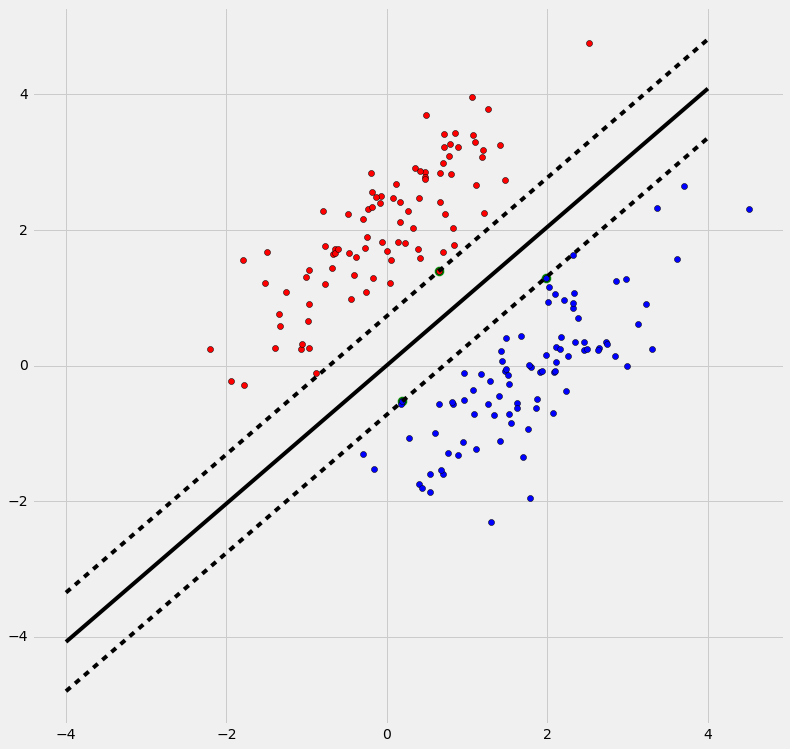

In [128]:
test_linear()

     pcost       dcost       gap    pres   dres
 0: -4.0465e+01 -1.0766e+02  1e+03  3e+01  3e+00
 1: -9.5918e+01 -1.4597e+02  8e+02  2e+01  2e+00
 2: -4.2416e+01 -2.5769e+01  3e+02  7e+00  6e-01
 3: -6.1743e+00 -9.2430e-01  3e+01  6e-01  5e-02
 4: -5.3642e-01 -5.6855e-01  3e+00  6e-02  4e-03
 5: -2.1876e-01 -4.4217e-01  1e+00  2e-02  2e-03
 6: -2.3074e-01 -3.9827e-01  9e-01  1e-02  9e-04
 7: -2.2409e-01 -2.9036e-01  3e-01  3e-03  2e-04
 8: -2.3310e-01 -2.6090e-01  8e-02  7e-04  6e-05
 9: -2.3288e-01 -2.5893e-01  4e-02  2e-04  1e-05
10: -2.5080e-01 -2.5397e-01  4e-03  1e-05  1e-06
11: -2.5296e-01 -2.5365e-01  9e-04  3e-06  2e-07
12: -2.5343e-01 -2.5362e-01  2e-04  6e-17  3e-14
13: -2.5360e-01 -2.5361e-01  4e-06  6e-17  2e-14
14: -2.5361e-01 -2.5361e-01  4e-08  3e-16  3e-14
Optimal solution found.
7 support vectors out of 180 points
20 out of 20 predictions correct


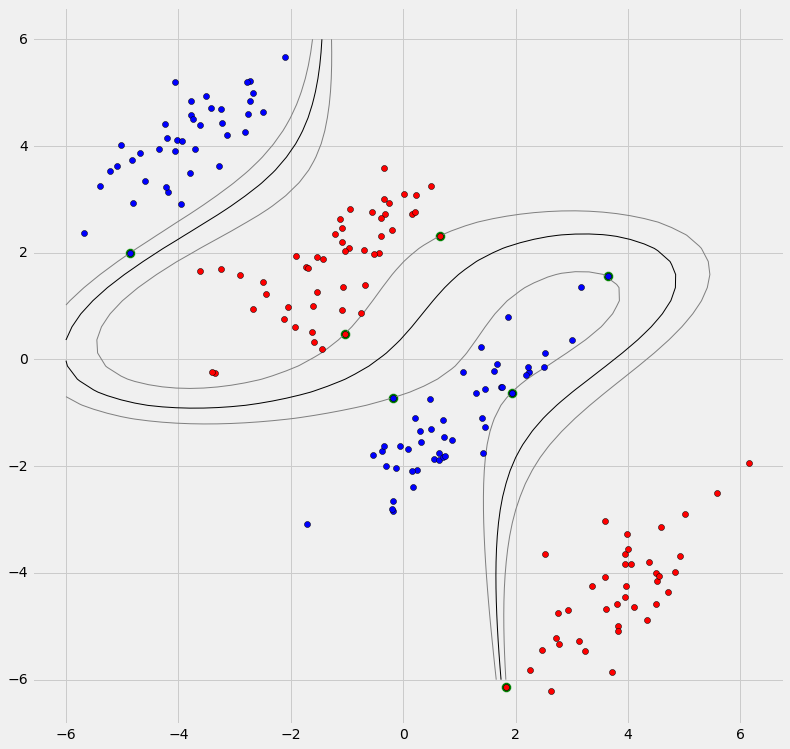

In [129]:
test_non_linear()

     pcost       dcost       gap    pres   dres
 0: -1.9797e+01 -3.1819e+01  1e+03  2e+01  7e-15
 1: -3.7418e+00 -2.9130e+01  7e+01  1e+00  7e-15
 2: -2.0888e+00 -1.2062e+01  1e+01  9e-02  1e-15
 3: -2.1454e+00 -3.6619e+00  2e+00  1e-02  2e-15
 4: -2.4676e+00 -2.9187e+00  5e-01  3e-03  1e-15
 5: -2.5647e+00 -2.7104e+00  2e-01  8e-04  1e-15
 6: -2.6058e+00 -2.6341e+00  3e-02  4e-06  2e-15
 7: -2.6171e+00 -2.6216e+00  4e-03  5e-07  1e-15
 8: -2.6192e+00 -2.6193e+00  9e-05  3e-09  1e-15
 9: -2.6192e+00 -2.6192e+00  2e-06  6e-11  1e-15
Optimal solution found.
37 support vectors out of 180 points
20 out of 20 predictions correct


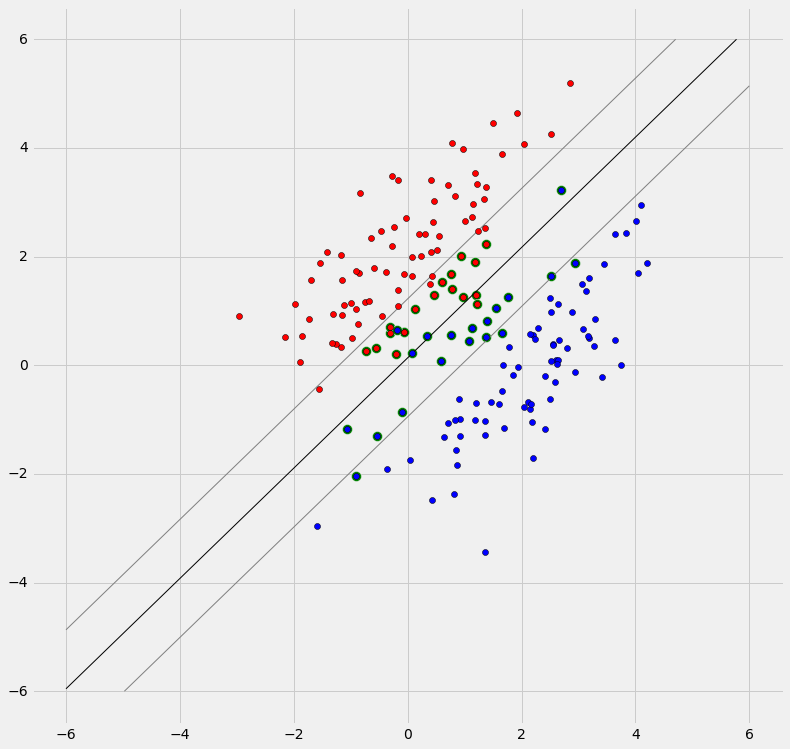

In [130]:
test_soft()

---
# Support Vector Machine Classification with More than Two Classies

Cases
---
- OVR: "One versus Rest" -- each group SVM compared to "all other data points"
- OVO: "One versus One" -- each group SVM compared to each other group indiviudally

OVR
---
Given 3 groups, we can 
- split group 1 from group 2+3 as a clump
- then split group 2 from group 1+3 as a clump
- then split group 3 from group 1+2 as a clump

**Complications to OVR:** there is a weighting issue, such that (in the case of three, well-balaned groups), each separating hyperplanes is comparing a different number of objects to train with.  Example, group 3 has 4 points, and group 1+2 has 8 points.

OVO
---
Given 3 groups, we can
- SVM compare group 1 to group 2
- SVM compare group 1 to group 3
- SVM compare group 2 to group 3

Given a new test data point between group 2 and 3, it would be above the g1 - g2 hyperplane, therefore it's more likely to be a 2 than a 1.  Then compare it to the hyperplane separating g2 - g3: it's on the g2 side.

**Overall:** it's usually more computations to do OVO, but OVO is more balanced than OVR (balance in prediction is directly related to the balance in number of features per class.

If OVR is getting to fuzzy, then try OVO.  Or if OVO is getting to computationally expensive, then try OVR.

---
SKlearn Package - Parameter characterization, function, impact, and defaults
---

Known as "C-

class sklearn.svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=Fasle, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None)

**Input Parameters:**

    C           : float, optional (default=1.0)
                    Penalty parameter C of the error term.
                    C = 0.0 --> hard margin classifier
                    C > 0.0 --> soft margin classifier
    
    kernel      : string, optional (default='rbf')
                    Specifies the kernal type to be used in the algorithm. It must be 
                    one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed' or a callable.
                    If non is given, 'rbf' will be used. If a callable is given it is used
                    to pre-compute the kernel matrix from data matrices; that matrix 
                    should be an aray of shape (n_samples, n_samples).
    
    degree      : int, optional (default=3)
                    Degree of polynomial kernel function ('poly').
                    Ignored by all other kernels.

    gamma       : float, optional (default='auto')
                    Kernel coefficient for 'rbf', 'poly', 'sigmoid'. 
                    If gamma is 'auto', then 1/n_features will be used instead.
    
    coef0       : float, optional (default=0.0)
                    Independent term in kernel function. 
                    It is only significant in 'poly' and 'sigmoid'.
    
    probability : boolean, optional (default=False)
                    Whether to enable probability estimates. 
                    This must be enabled prior to calling fit, and will slown down that method.
                    - In addition to accuracy, you can have a probabilistic vote for confidence on any class given.
    
    shrinking   : boolean, optional (default=True)
                    Whether to use the shrinking heuristic]
                    -- Related to SMO (sequential minimal optimization) by John Platt from Microsoft in 2004(?)
    
    tol         : float, optional (default=1e-3)
                    Tolerance for stopping criterion.

    cache_size  : float, optional
                    Specify the size of the kernal cache (in MB).

    class_weight: {dict, 'balanced'}, optional
                    Set the parameter C of class i to class_weight[i]*C for SVC. 
                    If not given, all classes are supposed to have weight one.
                    The "balanced" mode uses the values of y to automatically adjust 
                    weights inversely proportional to class frequencies in the input 
                    data as n_samples / (n_classes*np.bincount(y))

    verbose     : boolean, optional (default=False)
                    Enable verbose output. Note that this setting takes advantage of
                    a per-process runtime setting in libsvm that, if enabled, may not
                    work properly in a multithreaded context.
    
    max_iter    : int, option (default=1)
                    Hard limit on iterations within solver, or -1 for no limite.
    
    decision_function_shape : 'ovo, 'ovr', or None (default=None)
                    Whether to return a one-vs-rest ('ovr') decision function of shape
                    (n_samples, n_classes) as all other classifiers, or the original 
                    one-vs-one ('ovo') decision function of libsvm which has shape 
                    (n_samples, n_classes*(n_classes-1)/2). The default of None will 
                    currently behave as 'ovo' for backward compatibility and raise a 
                    deprecation warning, but will change to 'ovr' in 0.18.

        New in version 0.17: decision_function_shape='ovr' is recommended.
        
        Changed in version 0.17: Deprecated decision_function_shape='ovo' and None

    random_state: int seed, RandomState instance, or None (default)
                    The seed of the pseudo random number generator to use when 
                    shuffling the data for probability estimation.

**Attributes:**

    support_         : array-like, shape = [n_SV]
                        indices of support vectors

    support_vectors_ : array-like, shape = [n_SV, n_features]
                        Support vectors

    n_support_       : array-like, dtype=int32, shape = [n_classes]
                        Number of support vectors for each class.
                        - Good to check n_support_ / n_samples to ensure is << 1.0 (<0.1)

    dual_coef_       : array, shape = [n_class-1, n_SV]
                        Coefficients of the support vector in the decision function.
                        For multiclass, coefficient for all 1-vs-1 classifiers. 
                        The layout of the coefficients in the multiclass case is comewhat non-trivial.
                        See the section about multi-class classification in the SVM section 
                        of the User Guide for Details.

    coef_            : array, shape = [n_class-1, n_features]
                        Weights assigned to the features (coefficients in the primal problem).
                        This is only available in the case of the linear kernel.
                        
                        `coef_` is a readonly property derived from `dual_coeff_` and `support_vectors_`

    intercept_       : array, shape = [n_class * (n_class-1) /2 ]
                        Constants in decision function

**Examples:**
    
    >>> import numpy as np
    >>> X = np.array([[-1,-1], [-2,-1], [1,1], [2,1]])
    >>> y = np.array([1,1,2,2])
    >>> from sklearn.svm import SVC
    >>> clf = SVC()
    >>> clr.fit(X,y)
    SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
        decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
        max_iter=-1, probability=False, random_state=None, shrinking=True,
        tol=0.001, verbose=False)    
    >>> print(clf.predict([[-0.8,-1]]))
    [1]
    
**See Also:**

    SVR
        Support Vector Machine for Regression implemented using libsvm

    LinearSVC
        Scalable Linear Support Vector Machine for classification
        implemeneted using liblinear. Check the See also section of
        LinearSVC for more comparison element.